In [30]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
# import data
db = pd.read_csv("./Data/dollar_bars.csv", delimiter=',')
db['date'] = pd.to_datetime(db['date'], format="%m/%d/%Y %H:%M:%S")
db['date_'] = db['date']
db.head()

,date,open,high,low,volume,close,date_
0,2013-09-01 18:18:59,1640.25,1642.00,1639.00,21722,1641.25,2013-09-01 18:18:59
1,2013-09-01 21:42:07,1641.25,1643.50,1639.75,21713,1640.75,2013-09-01 21:42:07
2,2013-09-02 02:05:25,1640.75,1644.50,1640.50,21645,1644.50,2013-09-02 02:05:25
3,2013-09-02 03:02:09,1644.50,1646.00,1642.75,21722,1645.25,2013-09-02 03:02:09
4,2013-09-02 04:32:44,1645.25,1647.25,1644.25,21654,1645.50,2013-09-02 04:32:44


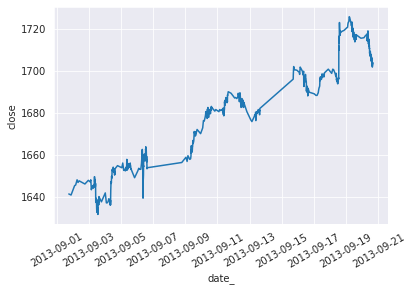

In [92]:
sns.set_style('darkgrid')
sns.lineplot(x='date_', y='close', data=db)
plt.xticks(rotation=30)
plt.show()

In [93]:
# Calculate Return, Log Return
def nans(shape, dtype=float):
    # To generate nans array
    a = np.empty(shape, dtype)
    a.fill(np.nan)
    return a

def shift(price_array, n):
    # n is the number shift to the right
    result = nans(len(price_array))
    for i in range(n,len(price_array)):
        result[i] = price_array[i-n]
    return result

def normal_neturn(P_f, P_i):
    result = (P_f - P_i)/P_i
    return result

def log_return(P_f, P_i):
    result = np.log(P_f/P_i)
    return result

In [94]:
db['Log_Return'] = log_return(db['close'],shift(db['close'],1))
db.head()

,date,open,high,low,volume,close,date_,Log_Return
0,2013-09-01 18:18:59,1640.25,1642.00,1639.00,21722,1641.25,2013-09-01 18:18:59,NaN
1,2013-09-01 21:42:07,1641.25,1643.50,1639.75,21713,1640.75,2013-09-01 21:42:07,-0.000305
2,2013-09-02 02:05:25,1640.75,1644.50,1640.50,21645,1644.50,2013-09-02 02:05:25,0.002283
3,2013-09-02 03:02:09,1644.50,1646.00,1642.75,21722,1645.25,2013-09-02 03:02:09,0.000456
4,2013-09-02 04:32:44,1645.25,1647.25,1644.25,21654,1645.50,2013-09-02 04:32:44,0.000152


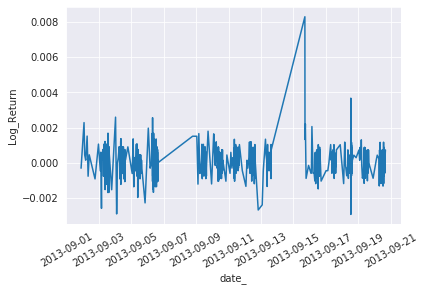

In [95]:
sns.set_style('darkgrid')
sns.lineplot(x='date_', y='Log_Return', data=db)
plt.xticks(rotation=30)
plt.show()

In [96]:
# Bera-Jarque
stats.jarque_bera(np.array(db['Log_Return'].dropna()))

(11519.487972281377, 0.0)

In [107]:
# import data
tb = pd.read_csv("./Data/time_bars.csv", delimiter=',')
tb['date'] = pd.to_datetime(tb['date'], format="%Y-%m-%d %H:%M:%S")
tb['date_'] = tb['date']

In [108]:
tb.head()

,date,open,high,low,close,volume,vwap,date_
0,2013-09-01 17:16:00,1640.25,1642.00,1639.00,1640.00,10825,1640.317090,2013-09-01 17:16:00
1,2013-09-01 17:44:00,1640.00,1642.00,1639.50,1641.25,7039,1640.837122,2013-09-01 17:44:00
2,2013-09-01 18:12:00,1641.25,1642.00,1640.75,1641.00,3161,1641.457213,2013-09-01 18:12:00
3,2013-09-01 18:40:00,1641.00,1641.25,1640.50,1640.75,1277,1640.910532,2013-09-01 18:40:00
4,2013-09-01 19:08:00,1640.75,1640.75,1639.75,1640.25,2093,1640.348065,2013-09-01 19:08:00


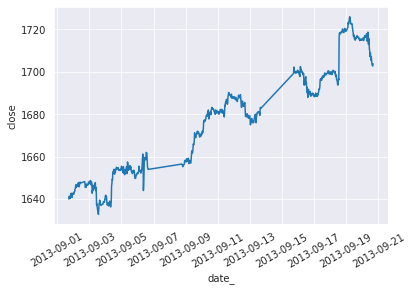

In [109]:
sns.set_style('darkgrid')
sns.lineplot(x='date_', y='close', data=tb)
plt.xticks(rotation=30)
plt.show()

In [110]:
tb['Log_Return'] = log_return(tb['close'],shift(tb['close'],1))
tb.head()

,date,open,high,low,close,volume,vwap,date_,Log_Return
0,2013-09-01 17:16:00,1640.25,1642.00,1639.00,1640.00,10825,1640.317090,2013-09-01 17:16:00,NaN
1,2013-09-01 17:44:00,1640.00,1642.00,1639.50,1641.25,7039,1640.837122,2013-09-01 17:44:00,0.000762
2,2013-09-01 18:12:00,1641.25,1642.00,1640.75,1641.00,3161,1641.457213,2013-09-01 18:12:00,-0.000152
3,2013-09-01 18:40:00,1641.00,1641.25,1640.50,1640.75,1277,1640.910532,2013-09-01 18:40:00,-0.000152
4,2013-09-01 19:08:00,1640.75,1640.75,1639.75,1640.25,2093,1640.348065,2013-09-01 19:08:00,-0.000305


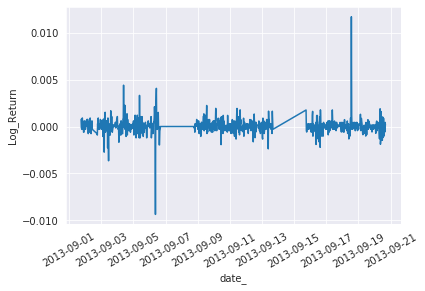

In [111]:
sns.set_style('darkgrid')
sns.lineplot(x='date_', y='Log_Return', data=tb)
plt.xticks(rotation=30)
plt.show()

In [112]:
# Bera-Jarque
stats.jarque_bera(np.array(tb['Log_Return'].dropna()))

(87236.4193828471, 0.0)

In [113]:
stats.kurtosis(np.array(db['Log_Return'].dropna()))

16.219245556283887

In [114]:
stats.kurtosis(np.array(tb['Log_Return'].dropna()))

53.13433690210999

In [57]:
tb['Log_Return'].dropna()

1      0.000762
2     -0.000152
3     -0.000152
4     -0.000305
5      0.000914
         ...   
971   -0.000880
972    0.000000
973   -0.000587
974    0.000440
975    0.000147
Name: Log_Return, Length: 739, dtype: float64

Dataset 2

In [103]:
# import data
db_2 = pd.read_csv("./Data_2/dollar_bars.csv", delimiter=',')
db_2['date'] = pd.to_datetime(db_2['date'], format="%m/%d/%Y %H:%M:%S.%f")
db_2['date_'] = db_2['date']
db_2.head()

,date,open,high,low,close,volume,vwap,date_
0,2013-09-01 21:02:35.415,1640.25,1643.50,1639.00,1642.25,39914.0,1641.234285,2013-09-01 21:02:35.415
1,2013-09-02 02:37:13.790,1642.25,1646.00,1640.25,1645.75,40020.0,1643.457284,2013-09-02 02:37:13.790
2,2013-09-02 05:49:06.326,1645.75,1647.25,1643.75,1646.75,39877.0,1645.874082,2013-09-02 05:49:06.326
3,2013-09-02 08:35:44.522,1646.75,1648.50,1645.50,1645.50,39858.0,1647.213589,2013-09-02 08:35:44.522
4,2013-09-02 19:34:33.615,1645.50,1648.50,1645.25,1646.75,39861.0,1646.894991,2013-09-02 19:34:33.615


In [104]:
db_2['Log_Return'] = log_return(db_2['close'],shift(db_2['close'],1))
db_2.head()

,date,open,high,low,close,volume,vwap,date_,Log_Return
0,2013-09-01 21:02:35.415,1640.25,1643.50,1639.00,1642.25,39914.0,1641.234285,2013-09-01 21:02:35.415,NaN
1,2013-09-02 02:37:13.790,1642.25,1646.00,1640.25,1645.75,40020.0,1643.457284,2013-09-02 02:37:13.790,0.002129
2,2013-09-02 05:49:06.326,1645.75,1647.25,1643.75,1646.75,39877.0,1645.874082,2013-09-02 05:49:06.326,0.000607
3,2013-09-02 08:35:44.522,1646.75,1648.50,1645.50,1645.50,39858.0,1647.213589,2013-09-02 08:35:44.522,-0.000759
4,2013-09-02 19:34:33.615,1645.50,1648.50,1645.25,1646.75,39861.0,1646.894991,2013-09-02 19:34:33.615,0.000759


In [105]:
stats.jarque_bera(np.array(db_2['Log_Return'].dropna()))

(3184.268082714994, 0.0)

In [106]:
stats.kurtosis(np.array(db_2['Log_Return'].dropna()))

11.481248010946716

In [115]:
# import data
tb_2 = pd.read_csv("./Data_2/time_bars.csv", delimiter=',')
tb_2['date'] = pd.to_datetime(tb_2['date'], format="%Y-%m-%d %H:%M:%S")
tb_2['date_'] = tb_2['date']
tb_2.head()

,date,open,high,low,close,volume,vwap,date_
0,2013-09-01 18:00:00,1640.25,1642.00,1639.00,1641.75,19792,1640.626604,2013-09-01 18:00:00
1,2013-09-01 19:00:00,1641.50,1641.75,1640.00,1640.50,3695,1640.856157,2013-09-01 19:00:00
2,2013-09-01 20:00:00,1640.25,1643.50,1639.75,1642.50,10705,1641.928538,2013-09-01 20:00:00
3,2013-09-01 21:00:00,1642.50,1642.75,1641.75,1642.75,5479,1642.275370,2013-09-01 21:00:00
4,2013-09-01 22:00:00,1642.50,1642.75,1640.25,1641.00,4389,1641.380497,2013-09-01 22:00:00


In [116]:
tb_2['Log_Return'] = log_return(tb_2['close'],shift(tb_2['close'],1))
tb_2.head()

,date,open,high,low,close,volume,vwap,date_,Log_Return
0,2013-09-01 18:00:00,1640.25,1642.00,1639.00,1641.75,19792,1640.626604,2013-09-01 18:00:00,NaN
1,2013-09-01 19:00:00,1641.50,1641.75,1640.00,1640.50,3695,1640.856157,2013-09-01 19:00:00,-0.000762
2,2013-09-01 20:00:00,1640.25,1643.50,1639.75,1642.50,10705,1641.928538,2013-09-01 20:00:00,0.001218
3,2013-09-01 21:00:00,1642.50,1642.75,1641.75,1642.75,5479,1642.275370,2013-09-01 21:00:00,0.000152
4,2013-09-01 22:00:00,1642.50,1642.75,1640.25,1641.00,4389,1641.380497,2013-09-01 22:00:00,-0.001066


In [117]:
stats.jarque_bera(np.array(tb_2['Log_Return'].dropna()))

(24655.268046504934, 0.0)

In [118]:
stats.kurtosis(np.array(tb_2['Log_Return'].dropna()))

40.817869631399425